In [1]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#数据预处理(Data preprocessing)
由于有一些队伍没做改动，我很怀疑他们认真看review没，因此我把完全没改动的队伍去掉了


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/conference/Kai统计/试验.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   team                      47 non-null     int64  
 1   comment_count             47 non-null     int64  
 2   problem_count             47 non-null     int64  
 3   suggestion_count          47 non-null     int64  
 4   tone_count                47 non-null     float64
 5   before_commit_count       47 non-null     int64  
 6   before_addition_count     47 non-null     int64  
 7   before_deletion_count     47 non-null     int64  
 8   before_file_change_count  47 non-null     int64  
 9   before_delta              47 non-null     int64  
 10  before_total_line_change  47 non-null     int64  
 11  after_commit_count        47 non-null     int64  
 12  after_addition_count      47 non-null     int64  
 13  after_deletion_count      47 non-null     int64  
 14  after_file_c

In [3]:
data_cluster = data[['%commit','%addition','%deletion','%file','%delta','%total_line']]
data_cluster.info()
print(data_cluster)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   %commit      47 non-null     float64
 1   %addition    47 non-null     float64
 2   %deletion    47 non-null     float64
 3   %file        47 non-null     float64
 4   %delta       47 non-null     float64
 5   %total_line  47 non-null     float64
dtypes: float64(6)
memory usage: 2.3 KB
      %commit  %addition  %deletion      %file     %delta  %total_line
0   69.767442  80.882353  84.496124  69.841270  14.285714    82.641509
1   14.285714   4.081633  98.323353  15.000000  91.081382    88.424437
2   36.585366  49.586777  56.009070  28.333333  12.280702    52.648649
3   25.000000  72.727273  56.872038  34.615385  56.338028    64.965197
4   95.000000  94.532803  99.541985  95.000000  85.185185    96.508128
5   20.000000  84.705882  66.000000  27.272727  92.500000    80.454545
6   43.209877  57.762097 

#聚类分析(Cluster Analysis)

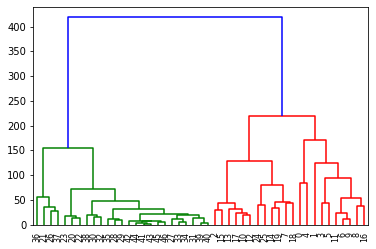

<Figure size 1440x864 with 0 Axes>

In [4]:
#hierarchical cluster
z=linkage(data_cluster,method = 'ward',metric = 'euclidean')
p = dendrogram(z)
#plt.style.use('ggplot')
plt.figure(figsize=(20,12))
plt.show()

#Kmeans cluster

[0.45244483350806275]
[0.45244483350806275, 0.402950014021229]
[0.45244483350806275, 0.402950014021229, 0.4274936618995847]
[0.45244483350806275, 0.402950014021229, 0.4274936618995847, 0.4410135793873913]
[0.45244483350806275, 0.402950014021229, 0.4274936618995847, 0.4410135793873913, 0.4537746242363809]
[0.45244483350806275, 0.402950014021229, 0.4274936618995847, 0.4410135793873913, 0.4537746242363809, 0.4563607328578736]
[0.45244483350806275, 0.402950014021229, 0.4274936618995847, 0.4410135793873913, 0.4537746242363809, 0.4563607328578736, 0.46337561056859633]
[0.45244483350806275, 0.402950014021229, 0.4274936618995847, 0.4410135793873913, 0.4537746242363809, 0.4563607328578736, 0.46337561056859633, 0.456222708369878]
[0.45244483350806275, 0.402950014021229, 0.4274936618995847, 0.4410135793873913, 0.4537746242363809, 0.4563607328578736, 0.46337561056859633, 0.456222708369878, 0.37633443622711293]
[0.45244483350806275, 0.402950014021229, 0.4274936618995847, 0.4410135793873913, 0.45377

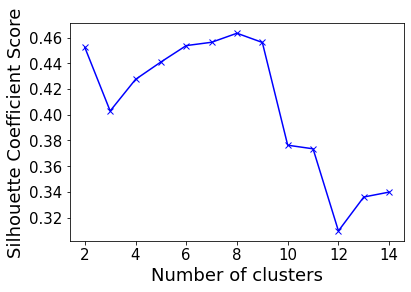

In [5]:
#分别创建分群2-15的KMeans模型
clusters = range(2,15)
sc_scores = []
for k in clusters:  
    kmeans_model = KMeans(n_clusters=k).fit(data_cluster)
    sc_score = metrics.silhouette_score(data_cluster, kmeans_model.labels_,sample_size=10000, metric='euclidean')
    sc_scores.append(sc_score)
    print(sc_scores)
#作出K—平均轮廓系数曲线
plt.figure()
plt.plot(clusters, sc_scores, 'bx-')
plt.rcParams['figure.figsize'] = [18,12]
plt.xlabel('Number of clusters',fontsize=18)
plt.ylabel('Silhouette Coefficient Score',fontsize=18)  #样本平均轮廓系数
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [6]:
plt.figure(figsize=(12, 18))
data_cluster_1 = data_cluster.values
k=2
y_pred = KMeans(n_clusters = k).fit_predict(data_cluster_1)

<Figure size 864x1296 with 0 Axes>

In [7]:
#calculate the cluster center
kmodel = KMeans(n_clusters = k)
kmodel.fit(data_cluster)
a = kmodel.labels_
b = pd.DataFrame(a)
print(b)
result = b.apply(pd.value_counts)
result
print(kmodel.cluster_centers_)

    0
0   0
1   0
2   0
3   0
4   0
5   0
6   0
7   0
8   0
9   0
10  0
11  0
12  0
13  1
14  0
15  0
16  0
17  0
18  0
19  0
20  1
21  1
22  1
23  1
24  0
25  0
26  1
27  1
28  1
29  1
30  1
31  1
32  1
33  1
34  1
35  1
36  1
37  1
38  1
39  1
40  1
41  1
42  1
43  1
44  1
45  1
46  1
[[46.03077981 43.24937408 48.02828766 43.91073784 43.87289595 47.31641102]
 [11.99686815  6.02600527  8.18278424  9.94109189 16.39590717  6.80980626]]


Text(0.5, 1.0, 'KMeans cluster')

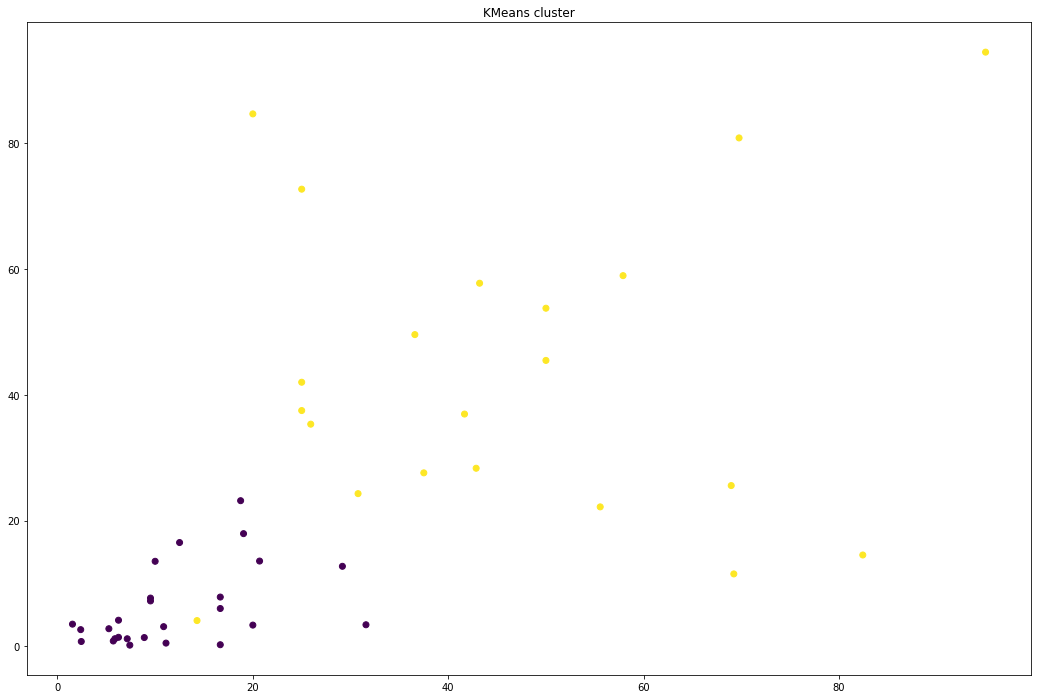

In [8]:

plt.scatter(data_cluster_1[:, 0], data_cluster_1[:, 1], c=y_pred)
plt.title("KMeans cluster")


In [9]:
data['y_pred'] = y_pred
print(data)
print(y_pred)
print(data[data['y_pred']==0])

     team  comment_count  ...  tone_count.1  y_pred
0   33389             57  ...            51       1
1   31983             77  ...            61       1
2   32843             50  ...            31       1
3   32776             38  ...            25       1
4   33401             54  ...            26       1
5   31998             80  ...            47       1
6   31969             68  ...            50       1
7   33407             51  ...            23       1
8   33382             69  ...            51       1
9   32931             51  ...            42       1
10  32789             53  ...            42       1
11  31996             73  ...            38       1
12  31991             77  ...            58       1
13  31972             80  ...            64       0
14  31975             77  ...            53       1
15  33379             67  ...            41       1
16  32782             40  ...            22       1
17  31994             73  ...            64       1
18  33388   

In [10]:
data_corr = data[['comment_count','problem_count','suggestion_count','tone_count','%commit','%addition','%deletion','%file','%delta','%total_line','y_pred']]

#Calculate the correlation in each cluster

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


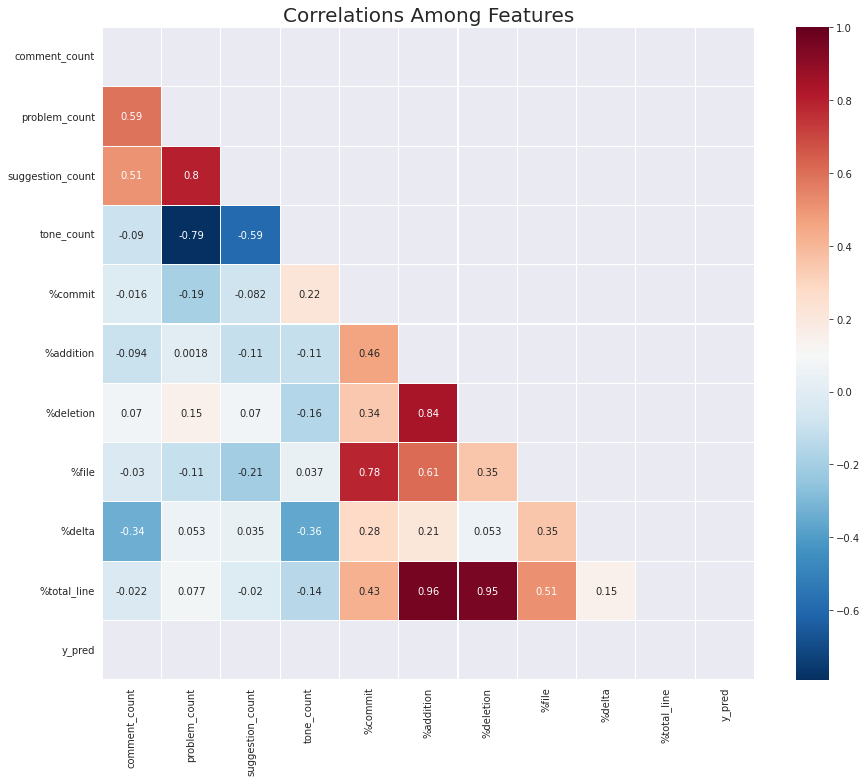

In [11]:
#first cluster center [84.18181818 49.36363636 20.36363636 63.1803359]comment多 problem多 suggestion多 tone较高
# Calculate Pearson coefficient of correlation
sns.set_style("darkgrid")
mask = np.zeros_like(data_corr[data_corr['y_pred']==0].corr(), dtype=np.bool)  
#print(mask)
# Visualize correlation coefficients as a heatmap
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,12))
sns.heatmap(data_corr[data_corr['y_pred']==0].corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = 1,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


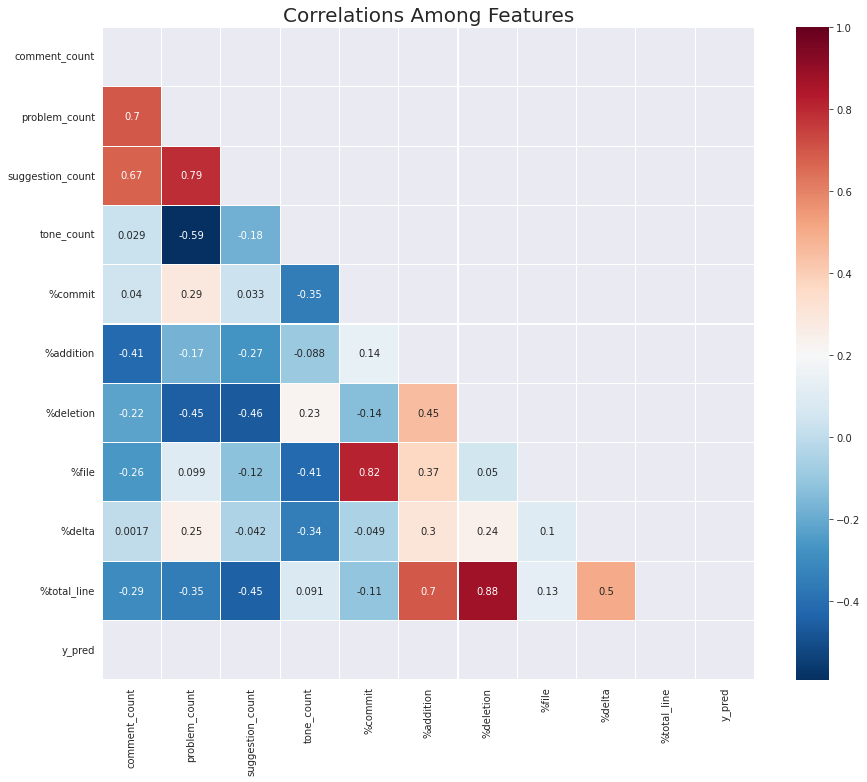

In [12]:
#[55.81818182 16.27272727  9.90909091 87.49267122]comment少 problem少 suggestion少 tone高
# Calculate Pearson coefficient of correlation
sns.set_style("darkgrid")
mask = np.zeros_like(data_corr[data_corr['y_pred']==1].corr(), dtype=np.bool)  
#print(mask)
# Visualize correlation coefficients as a heatmap
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,12))
sns.heatmap(data_corr[data_corr['y_pred']==1].corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = 1,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

#由于只有两类后面的代码不使用

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


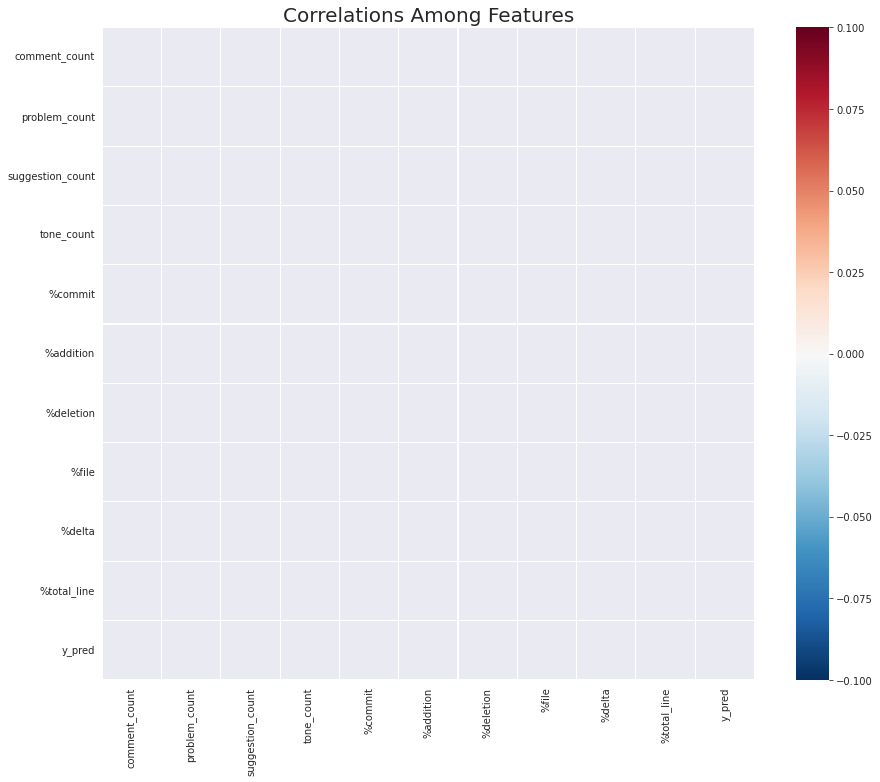

In [13]:
#[76.86666667 27.73333333 15.2        83.47100575]#comment较多 problem较多 suggestion较多 tone高
# Calculate Pearson coefficient of correlation
sns.set_style("darkgrid")
mask = np.zeros_like(data_corr[data_corr['y_pred']==2].corr(), dtype=np.bool)  
#print(mask)
# Visualize correlation coefficients as a heatmap
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,12))
sns.heatmap(data_corr[data_corr['y_pred']==2].corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = 1,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


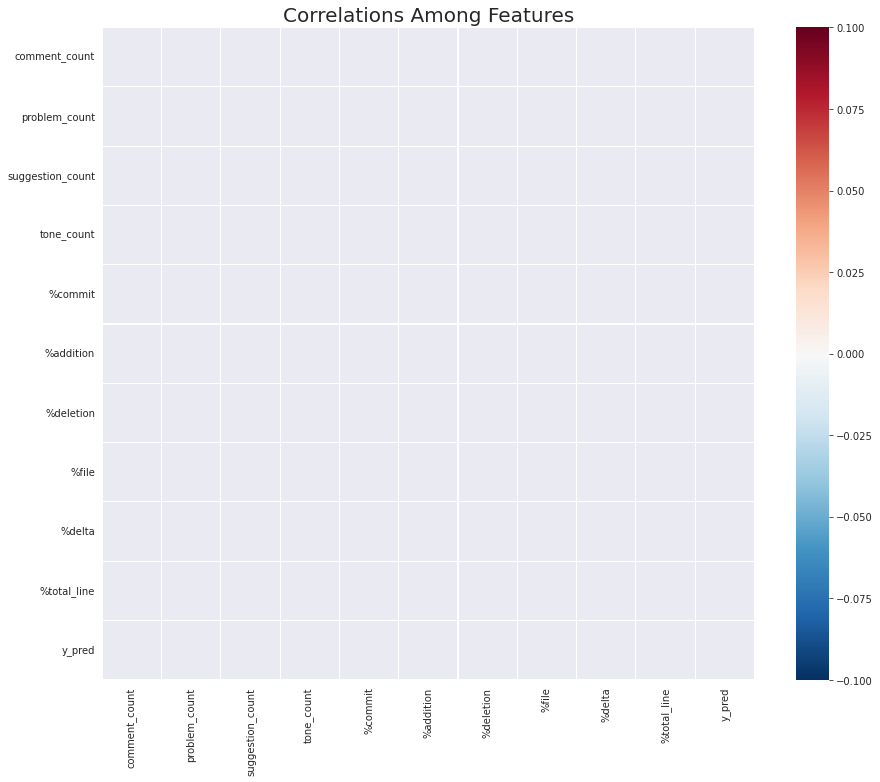

In [14]:
#[50.1        30.2        11.5        59.05251259]comment少 problem较少 suggestion较少 tone较少
# Calculate Pearson coefficient of correlation
sns.set_style("darkgrid")
mask = np.zeros_like(data_corr[data_corr['y_pred']==3].corr(), dtype=np.bool)  
#print(mask)
# Visualize correlation coefficients as a heatmap
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,12))
sns.heatmap(data_corr[data_corr['y_pred']==3].corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = 1,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

#Future work
After clustering, we can do some further research like factor analysis and partial correlation analysis.



Factor analysis contains principle component analysis.